Random Forest -> R2: 0.6645, RMSE: 44.2901
Bagging -> R2: 0.7016, RMSE: 41.7677
Gradient Boosting -> R2: 0.8426, RMSE: 30.3374
Voting -> R2: 0.7464, RMSE: 38.5057
Stacking -> R2: 0.1821, RMSE: 69.1552

Eng yaxshi model: Gradient Boosting


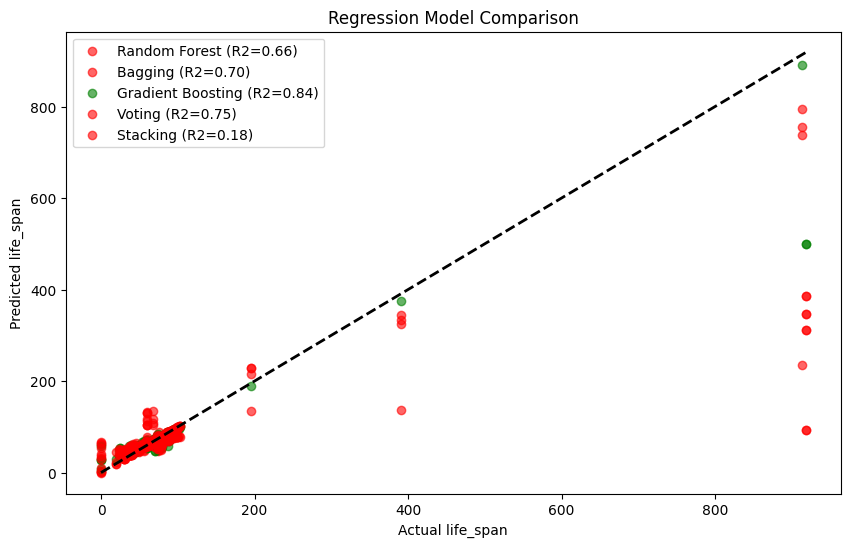

Eng yaxshi model saqlandi: C:\Users\Rasulbek907\Desktop\LifeSpan_Peoples\Models\best_model.pkl


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Ensemble regressors
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# CSV faylni o'qish
file_path = r"C:\Users\Rasulbek907\Desktop\LifeSpan_Peoples\Data\Feature_selection\Filtered_Features.csv"
df = pd.read_csv(file_path)

# Features va target ajratish
X = df.drop(columns=['life_span'])
y = df['life_span']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modellarni yaratish
rf = RandomForestRegressor(n_estimators=100, random_state=42)
bagging = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
gboost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
voting = VotingRegressor(estimators=[('rf', rf), ('gboost', gboost), ('bagging', bagging)])
stacking = StackingRegressor(
    estimators=[('rf', rf), ('gboost', gboost), ('bagging', bagging)],
    final_estimator=LinearRegression()
)

# Modellar ro'yxati
models = {
    'Random Forest': rf,
    'Bagging': bagging,
    'Gradient Boosting': gboost,
    'Voting': voting,
    'Stacking': stacking
}

# Natijalarni saqlash uchun
results = {}

# Modellarni fit qilish va baholash
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    r2 = r2_score(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    results[name] = {'model': model, 'pred': pred, 'r2': r2, 'rmse': rmse}
    print(f"{name} -> R2: {r2:.4f}, RMSE: {rmse:.4f}")

# Eng yaxshi modelni tanlash (R2 bo'yicha)
best_model_name = max(results, key=lambda x: results[x]['r2'])
best_model = results[best_model_name]['model']
print(f"\nEng yaxshi model: {best_model_name}")

# Vizualizatsiya
plt.figure(figsize=(10,6))
for name, info in results.items():
    color = 'green' if name == best_model_name else 'red'
    plt.scatter(y_test, info['pred'], label=f"{name} (R2={info['r2']:.2f})", alpha=0.6, color=color)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual life_span")
plt.ylabel("Predicted life_span")
plt.title("Regression Model Comparison")
plt.legend()
plt.show()

# Eng yaxshi modelni saqlash
save_path = r"C:\Users\Rasulbek907\Desktop\LifeSpan_Peoples\Models\best_model.pkl"
joblib.dump(best_model, save_path)
print(f"Eng yaxshi model saqlandi: {save_path}")